# merge

* [데이터 다운로드 링크](https://www.kaggle.com/ruchi798/shopping-cart-database?select=sales.csv)
* `자동화 기초(1) read_excel : 엑셀 파일 불러오기` 강의 참고

In [1]:
import pandas as pd

In [2]:
# 상품 
prd_df = pd.read_csv('/content/drive/MyDrive/data/products.csv', sep=',')
prd_df.head(3)

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"


In [3]:
sales_df = pd.read_csv('/content/drive/MyDrive/data/sales.csv', sep=',')
sales_df.head(3)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288


In [4]:
pd.merge(prd_df, sales_df, on=['product_id'], how='left')

KeyError: ignored

In [5]:
prd_df.columns

Index(['product_ID', 'product_type', 'product_name', 'size', 'colour', 'price',
       'quantity', 'description'],
      dtype='object')

In [6]:
prd_df.columns = ['product_id', 'product_type', 'product_name', 'size', 'colour', 'price', 'quantity', 'description']
prd_df

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
...,...,...,...,...,...,...,...,...
1255,1255,Trousers,Tracksuit Bottoms,XS,violet,91,67,"A violet coloured, XS sized, Tracksuit Bottoms..."
1256,1256,Trousers,Tracksuit Bottoms,S,violet,91,48,"A violet coloured, S sized, Tracksuit Bottoms ..."
1257,1257,Trousers,Tracksuit Bottoms,M,violet,91,73,"A violet coloured, M sized, Tracksuit Bottoms ..."
1258,1258,Trousers,Tracksuit Bottoms,L,violet,91,45,"A violet coloured, L sized, Tracksuit Bottoms ..."


In [7]:
pd.merge(prd_df, sales_df, on=['product_id'], how='left')

,product_id,product_type,product_name,size,colour,price,quantity_x,description,sales_id,order_id,price_per_unit,quantity_y,total_price
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",NaN,NaN,NaN,NaN,NaN
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22.0,5.0,96.0,3.0,288.0
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121.0,231.0,96.0,1.0,96.0
3,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741.0,353.0,96.0,3.0,288.0
4,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",3201.0,644.0,96.0,2.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,1258,Trousers,Tracksuit Bottoms,L,violet,91,45,"A violet coloured, L sized, Tracksuit Bottoms ...",4409.0,881.0,112.0,1.0,112.0
5023,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",133.0,28.0,112.0,3.0,336.0
5024,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",409.0,93.0,112.0,3.0,336.0
5025,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",968.0,198.0,112.0,2.0,224.0


In [8]:
pd.merge(prd_df, sales_df, on=['product_id'], how='left').fillna(0)

,product_id,product_type,product_name,size,colour,price,quantity_x,description,sales_id,order_id,price_per_unit,quantity_y,total_price
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",0.0,0.0,0.0,0.0,0.0
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22.0,5.0,96.0,3.0,288.0
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121.0,231.0,96.0,1.0,96.0
3,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741.0,353.0,96.0,3.0,288.0
4,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",3201.0,644.0,96.0,2.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,1258,Trousers,Tracksuit Bottoms,L,violet,91,45,"A violet coloured, L sized, Tracksuit Bottoms ...",4409.0,881.0,112.0,1.0,112.0
5023,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",133.0,28.0,112.0,3.0,336.0
5024,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",409.0,93.0,112.0,3.0,336.0
5025,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",968.0,198.0,112.0,2.0,224.0


In [9]:
pd.merge(prd_df, sales_df, on=['product_id'], how='left').dropna()

,product_id,product_type,product_name,size,colour,price,quantity_x,description,sales_id,order_id,price_per_unit,quantity_y,total_price
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22.0,5.0,96.0,3.0,288.0
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121.0,231.0,96.0,1.0,96.0
3,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741.0,353.0,96.0,3.0,288.0
4,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",3201.0,644.0,96.0,2.0,192.0
5,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",4962.0,992.0,96.0,3.0,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,1258,Trousers,Tracksuit Bottoms,L,violet,91,45,"A violet coloured, L sized, Tracksuit Bottoms ...",4409.0,881.0,112.0,1.0,112.0
5023,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",133.0,28.0,112.0,3.0,336.0
5024,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",409.0,93.0,112.0,3.0,336.0
5025,1259,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms...",968.0,198.0,112.0,2.0,224.0


In [10]:
df = pd.merge(prd_df, sales_df, on=['product_id'], how='left').fillna(0)
df.head(3)

,product_id,product_type,product_name,size,colour,price,quantity_x,description,sales_id,order_id,price_per_unit,quantity_y,total_price
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",0.0,0.0,0.0,0.0,0.0
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22.0,5.0,96.0,3.0,288.0
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121.0,231.0,96.0,1.0,96.0


In [11]:
df.columns

Index(['product_id', 'product_type', 'product_name', 'size', 'colour', 'price',
       'quantity_x', 'description', 'sales_id', 'order_id', 'price_per_unit',
       'quantity_y', 'total_price'],
      dtype='object')

In [12]:
df.columns = ['product_id', 'product_type', 'product_name', 'size', 'colour', 'price', 'prd_quantity'
            , 'description', 'sales_id', 'order_id', 'price_per_unit', 'sales_quantity', 'total_price']

In [13]:
df.head(3)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,price_per_unit,sales_quantity,total_price
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",0.0,0.0,0.0,0.0,0.0
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22.0,5.0,96.0,3.0,288.0
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121.0,231.0,96.0,1.0,96.0


In [ ]:
df[df['sales_quantity'] == 0].head()

In [15]:
# df = df[~(df['sales_quantity'] == 0)]
df = df.loc[(df['sales_quantity'] != 0)]
df.head(3)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,price_per_unit,sales_quantity,total_price
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22.0,5.0,96.0,3.0,288.0
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121.0,231.0,96.0,1.0,96.0
3,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741.0,353.0,96.0,3.0,288.0


In [16]:
df[df['sales_quantity'] == 0].head(5)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,price_per_unit,sales_quantity,total_price


In [ ]:
# merge(products, sales)
df.head(3)

In [17]:
ord_df = pd.read_csv('/content/drive/MyDrive/data/orders.csv', sep=',')
ord_df.head(3)

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03


In [18]:
cust_df = pd.read_csv('/content/drive/MyDrive/data/customers.csv', sep=',')
cust_df.head(3)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia


# ERD

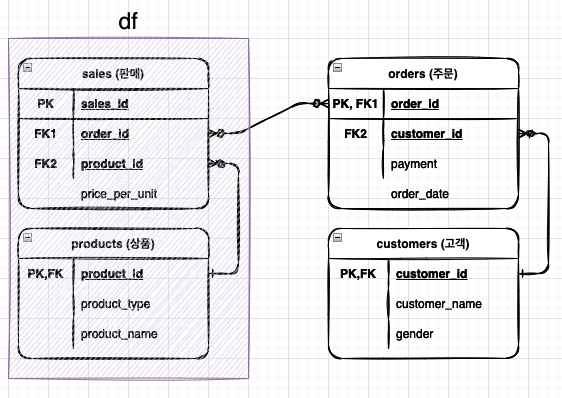

In [19]:
df = pd.merge(df, ord_df, on=['order_id'], how='left')
df.head(3)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,price_per_unit,sales_quantity,total_price,customer_id,payment,order_date,delivery_date
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22.0,5.0,96.0,3.0,288.0,441,14719,2021-3-23,2021-03-24
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121.0,231.0,96.0,1.0,96.0,731,58824,2021-3-20,2021-04-09
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741.0,353.0,96.0,3.0,288.0,774,46198,2021-3-30,2021-04-05


In [20]:
df = pd.merge(df, cust_df, on=['customer_id'], how='left')
df.head(3)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,price_per_unit,sales_quantity,total_price,customer_id,payment,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22.0,5.0,96.0,3.0,288.0,441,14719,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121.0,231.0,96.0,1.0,96.0,731,58824,2021-3-20,2021-04-09,Olimpia Tankus,Genderfluid,39,6434 Callum RoadApt. 396,3505,North Jessica,Western Australia,Australia
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741.0,353.0,96.0,3.0,288.0,774,46198,2021-3-30,2021-04-05,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia


In [ ]:
pd.merge(pd.merge(df, ord_df, on=['order_id'], how='left'), cust_df, on= , how= )

In [21]:
df.to_excel('/content/drive/MyDrive/data/data.xlsx', index=None)